<center>
<hr>
<h1>Complessità nei sistemi sociali</h1>
<h2>Laurea Magistrale in Fisica Dei Sistemi Complessi</h2>
<h2>A.A. 2015/16</h2>
<h2>Dr. Daniela Paolotti, Dr. Michele Tizzoni</h2>
<h3>Week 5 - Dynamical processes on networks</h3>
<hr>
</center>

In [1]:
import networkx as nx
from operator import itemgetter

In [2]:
import seaborn as sns

//anaconda/lib/python2.7/site-packages/pandas/computation/__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Deterministic SIR

##### We set the parameters of the model

In [4]:
mu=0.2
R0=2.0
beta=R0*mu

In [5]:
beta

0.4

In [6]:
print "The average infectious period is ", 1./mu, " days"

The average infectious period is  5.0  days


In [10]:
N=1000000
I=100
S=N-I
R=0
    
St=[]
It=[]
Rt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.001:
    deltaSI=beta*(float(I)*float(S)/N)
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    St.append(S)
    It.append(I)
    Rt.append(R)

In [11]:
print "The final attack rate is ", Rt[-1]/N

The final attack rate is  0.8084674424


##### We plot the time varying curves of S, I and R

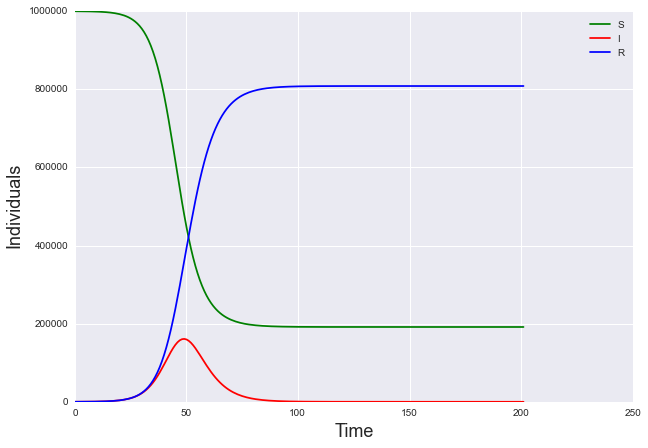

In [12]:
plt.figure(figsize=(10,7))
plt.plot(xrange(0, len(St)),St, label='S', color='g')
plt.plot(xrange(0, len(It)),It, label='I', color='r')
plt.plot(xrange(0, len(Rt)),Rt, label='R', color='b')

plt.xlabel('Time', fontsize=18)
plt.ylabel('Individuals', fontsize=18)

plt.legend(loc='upper right')

#### Stochastic SIR

In [13]:
from collections import defaultdict
import numpy as np

In [16]:
dict_I=defaultdict(list)#here we store the number of I at each time step, for each run

final_R=[]

nrun=1000
Irun=[]
for r in xrange(0,nrun):

    #for each run r, we set the initial conditions  
    N=1000000
    I=100
    S=N-I
    R=0
    
    list_I=[]

    t=0
    dict_I[t].append(I)
    while I>0:
        
        p=beta*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print "The average final attack rate is ", np.average(np.array(final_R))

The average final attack rate is  0.808492645


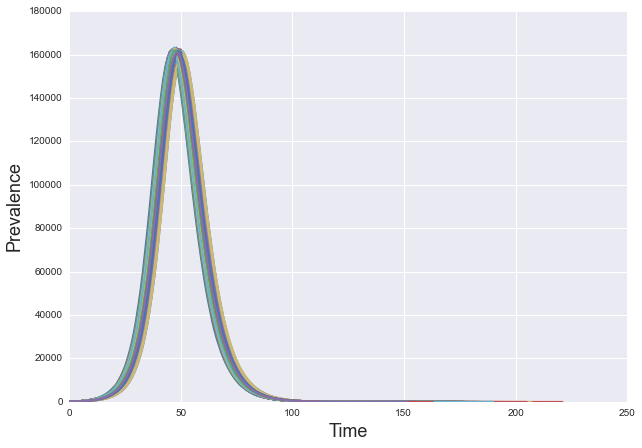

In [17]:
plt.figure(figsize=(10,7))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)

for r in Irun: 

    plt.plot(xrange(0,len(r)),r)
    
    

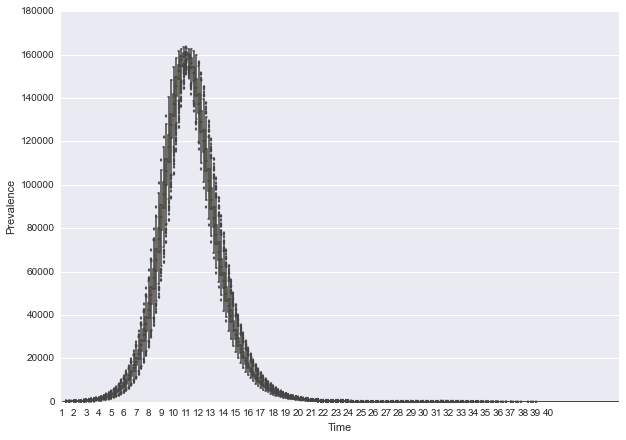

In [20]:
#too many lines are messy... let's draw a boxplot
full_array=[np.array(dict_I[t]) for t in dict_I]

plt.figure(figsize=(10,7))

plt.xlabel('Time')
plt.ylabel('Prevalence')

sns.boxplot(full_array)#this is kinda magic, isn't it?

plt.xticks(np.arange(0, 200, 5))
plt.show()

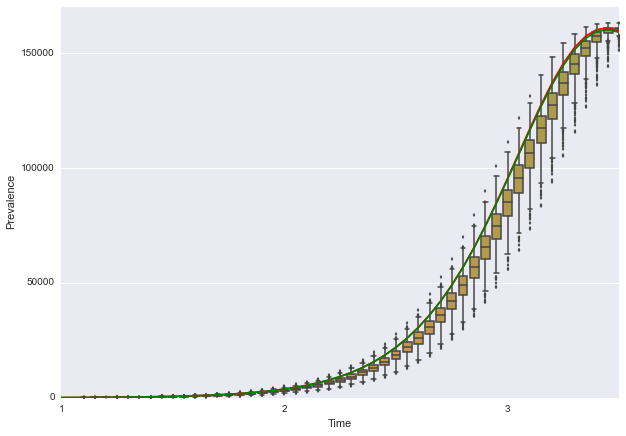

In [22]:
full_average=[np.average(np.array(dict_I[t])) for t in dict_I]

plt.figure(figsize=(10,7))

plt.xlabel('Time')
plt.ylabel('Prevalence')

sns.boxplot(full_array)
plt.plot(xrange(0,len(It)),It,color='r') #let's compare the result with the deterministic simulation
plt.plot(xrange(0,len(full_average)),full_average,color='g')

plt.xticks(np.arange(0, 200, 20))
plt.axis([0,50,-1,170000])
plt.show()

In [23]:
dict_I=defaultdict(list)#here we store the number of I at each time step, for each run

final_R=[]

nrun=100
Irun=[]
for r in xrange(0,nrun):

    #for each run r, we set the initial conditions  
    N=1000000
    I=1 #we start with only 1 infected!! 
    S=N-I
    R=0
    
    list_I=[]

    t=0
    dict_I[t].append(I)
    while I>0:
        
        p=beta*(float(I)/N)
        deltaSI=np.random.binomial(S,p)
        
        deltaIR=np.random.binomial(I,mu)
        
        S=S-deltaSI
        I=I+deltaSI-deltaIR
        R=R+deltaIR
        
        t+=1
        list_I.append(I)
        
        dict_I[t].append(I)
    
    final_R.append(float(R)/N)
    Irun.append(list_I)

print "The average final attack rate is ", np.average(np.array(final_R))

The average final attack rate is  0.42041964


#### With only 1 infected as a seed, we see more fluctuations 

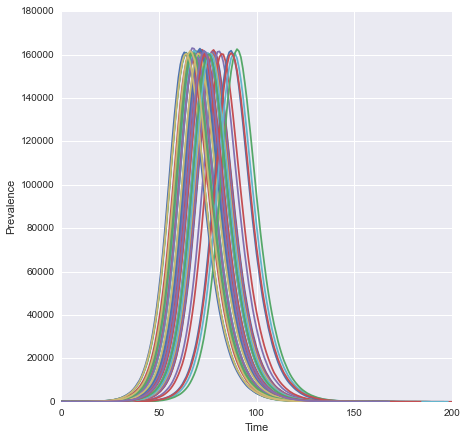

In [24]:
plt.figure(figsize=(7,7))
plt.xlabel('Time')
plt.ylabel('Prevalence')

for r in Irun: 

    plt.plot(xrange(0,len(r)),r)
    

#### We have several runs without outbreak!

In [25]:
for r in final_R:
    if r<0.8:
        print r

1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
2e-06
1e-06
2e-06
1e-06
2e-06
3e-06
2e-06
1e-06
1e-06
1e-06
1e-06
5e-06
1.1e-05
1e-06
2e-06
2e-06
2e-06
1e-06
1e-06
9e-06
2e-06
1e-06
1e-06
1e-06
1e-06
2e-06
1e-06
8e-06
6e-06
1e-06
1e-06
7e-06


(array([ 48.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  52.]),
 array([  1.00000000e-06,   4.05470500e-02,   8.10931000e-02,
          1.21639150e-01,   1.62185200e-01,   2.02731250e-01,
          2.43277300e-01,   2.83823350e-01,   3.24369400e-01,
          3.64915450e-01,   4.05461500e-01,   4.46007550e-01,
          4.86553600e-01,   5.27099650e-01,   5.67645700e-01,
          6.08191750e-01,   6.48737800e-01,   6.89283850e-01,
          7.29829900e-01,   7.70375950e-01,   8.10922000e-01]),
 <a list of 20 Patch objects>)

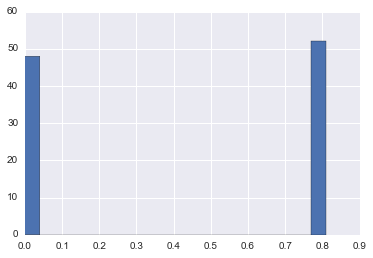

In [30]:
plt.hist(final_R, 20)

In [31]:
N=1000000
I=1
S=N-I
R=0
    

St=[]
It=[]
Rt=[]

St.append(S)
It.append(I)
Rt.append(R)

while I>0.5:
    deltaSI=beta*(float(I)*float(S)/N)
    deltaIR=mu*I
    
    S=S-deltaSI
    I=I+deltaSI-deltaIR
    R=R+deltaIR
    
    St.append(S)
    It.append(I)
    Rt.append(R)

#### In the deterministic model the outcome is fixed

In [32]:
print "The final attack rate is ", Rt[-1]/N

The final attack rate is  0.808430326634


##Stochastic SIR on networks

In [33]:
#import the 2010 US network
G=nx.Graph()
fh=open('./USairport_2010.txt','r')
for line in fh.readlines():
    s=line.strip().split()
    G.add_edge(int(s[0]),int(s[1]))
fh.close()  

In [34]:
G.code={}
G.name={}
G.pos={}

finfo=open('./USairport_2010_codes.txt','r')
for line in finfo.readlines():
    s=line.strip().split()
    node=int(s[0])
    G.code[node]=s[1]
    G.name[node]=s[2]
    G.pos[node]=[float(s[4]),float(s[3])]
finfo.close() 

In [35]:
#disease parameters
mu=0.2#infectious period
beta=0.01#probability of infection given a contact

In [36]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [37]:
#let's choose a seed
node_list=[]

deg=G.degree()
for i in sorted(deg.iteritems(), key=itemgetter(1)):
    node_list.append(i[0])
seed=node_list[-1]

print "The seed is", G.name[seed]
print "The degree of the seed is", G.degree(seed)

The seed is Denver
The degree of the seed is 192


In [38]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

In [39]:
I_net=[]
while len(infected_nodes)>0:
    
    #transmission
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<beta:
                    G.disease_status[j]=1
                
    
    #recovery
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    #update of disease status
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)
 
    #store output
    I_net.append(len(infected_nodes))

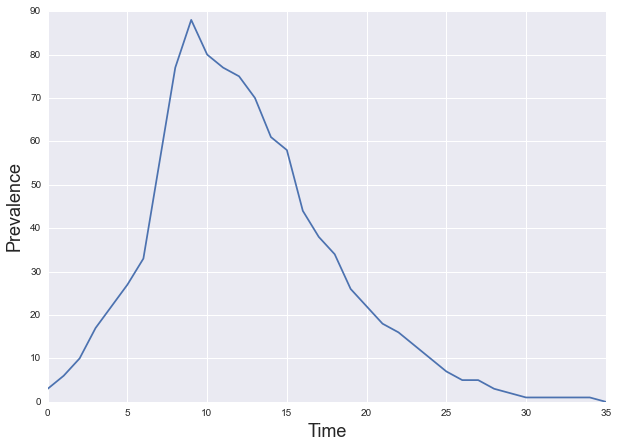

In [40]:
plt.figure(figsize=(10,7))
plt.xlabel('Time', fontsize=18)
plt.ylabel('Prevalence', fontsize=18)
plt.plot(xrange(0,len(I_net)),I_net)

In [41]:
recovered=0
for n in G.nodes():
    if G.disease_status[n]==-1:
        recovered+=1

print "The total number of infected nodes is", recovered
print "The final attack rate is", float(recovered)/len(G.nodes())
        

The total number of infected nodes is 203
The final attack rate is 0.501234567901


#### Visualize the infection spread on the network

In [42]:
#we need to store the disease status of each node
G.disease_status={} #S=0, I=1, R=-1

infected_nodes=[]#list of infected nodes

In [43]:
#initialize the network
infected_nodes.append(seed)

for n in G.nodes():
    if n in infected_nodes:
        G.disease_status[n]=1
        #infected
    else:
        G.disease_status[n]=0
        #susceptible

//anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


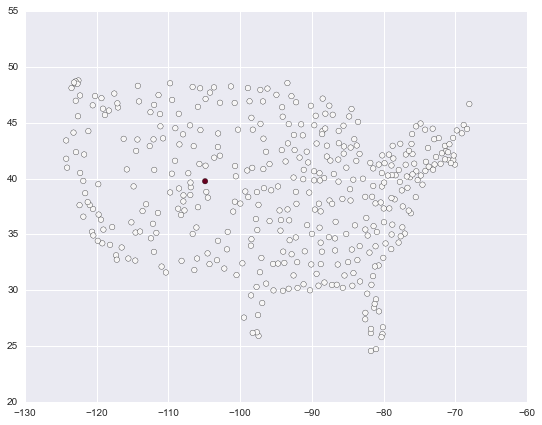

In [44]:
t=0
node_color=[G.disease_status[v] for v in G]#color code on disease status
plt.figure(figsize=(9,7))
nx.draw_networkx_nodes(G, pos=G.pos, node_size=30,node_color=node_color, cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)

#plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')

//anaconda/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


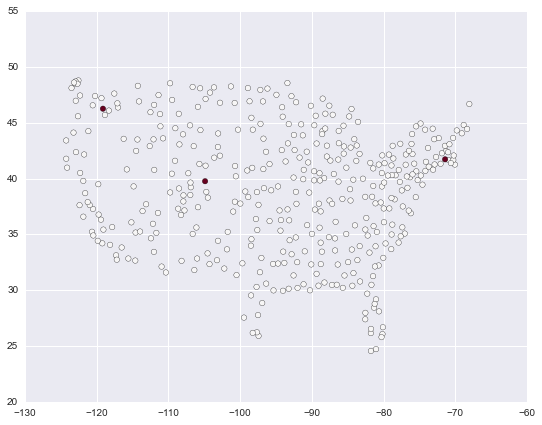

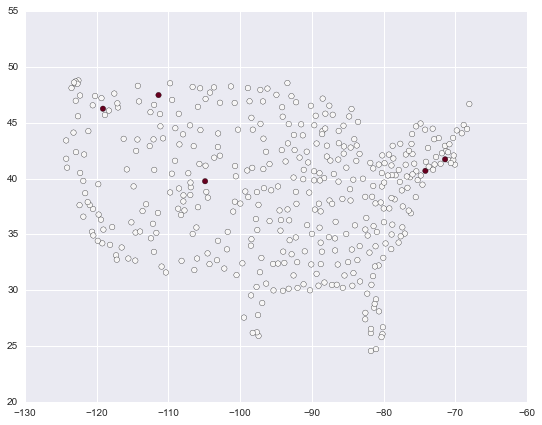

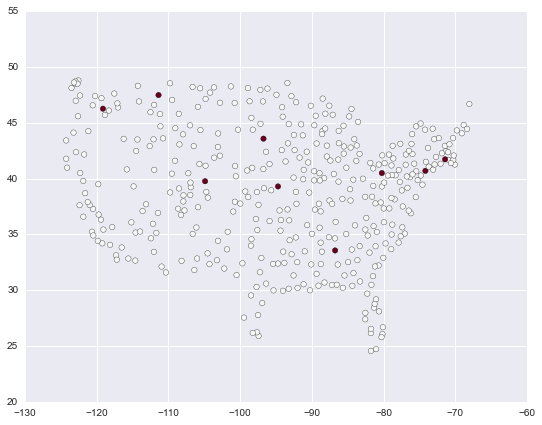

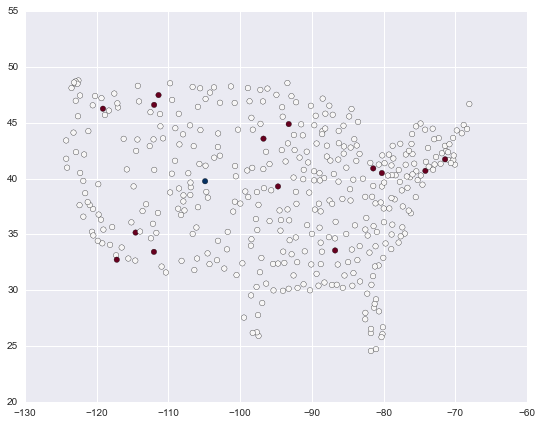

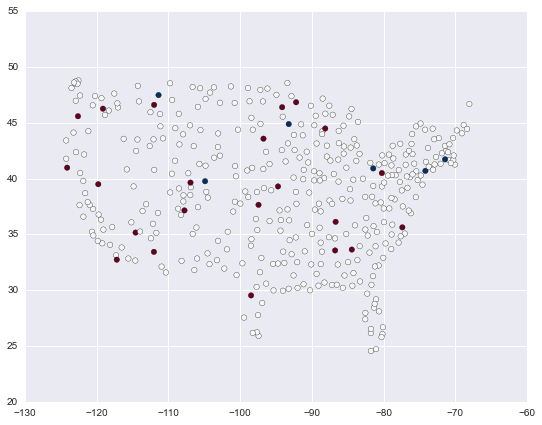

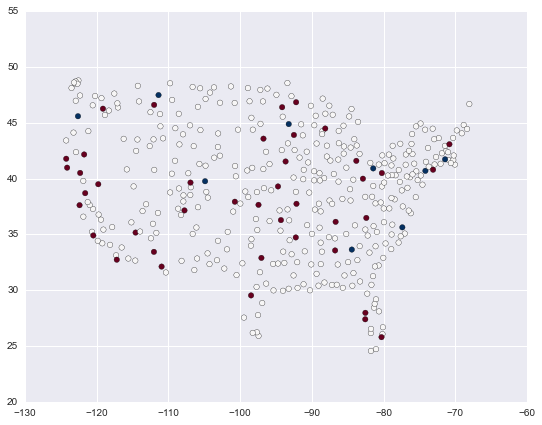

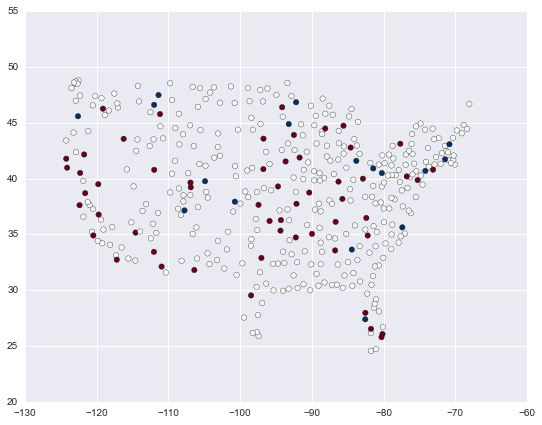

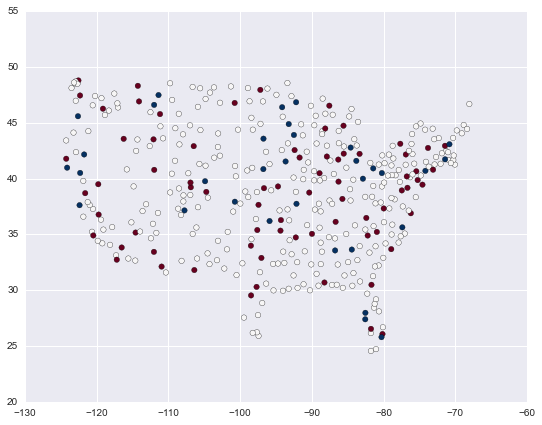

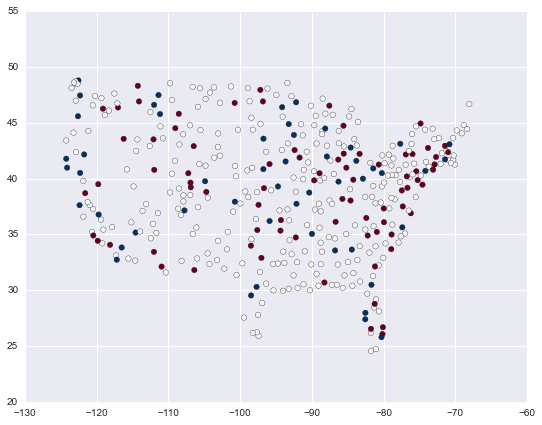

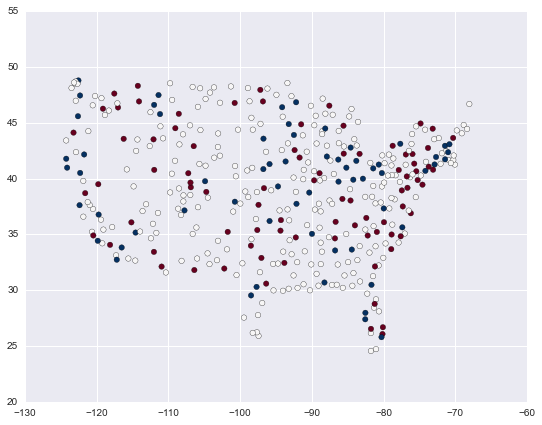

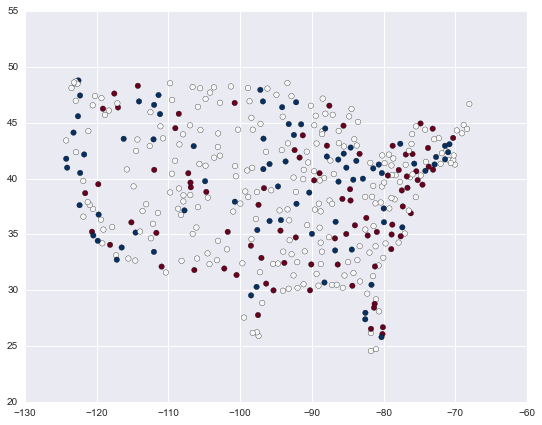

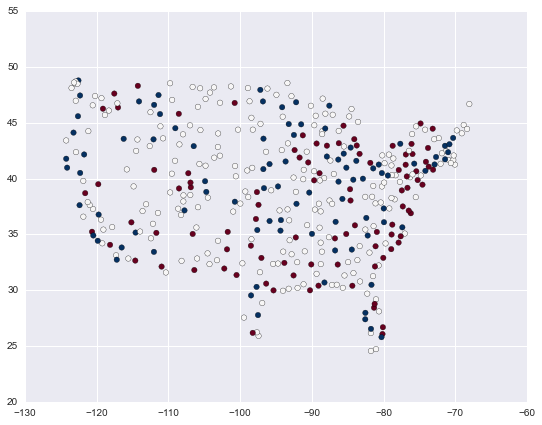

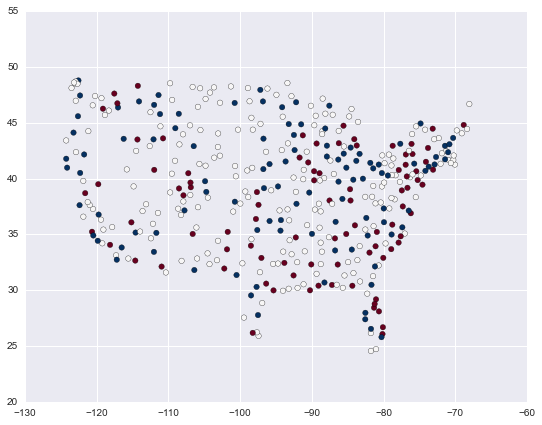

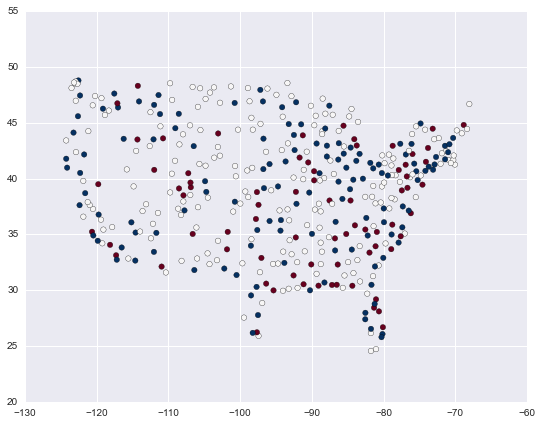

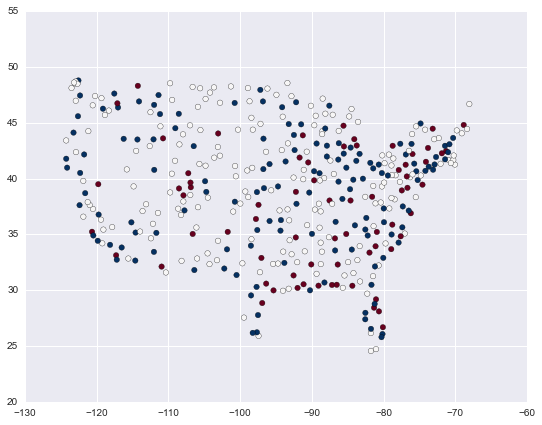

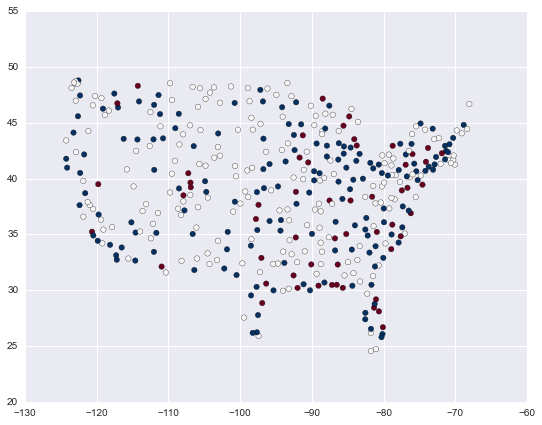

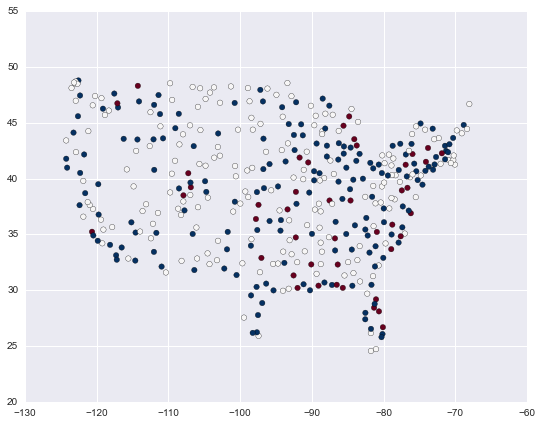

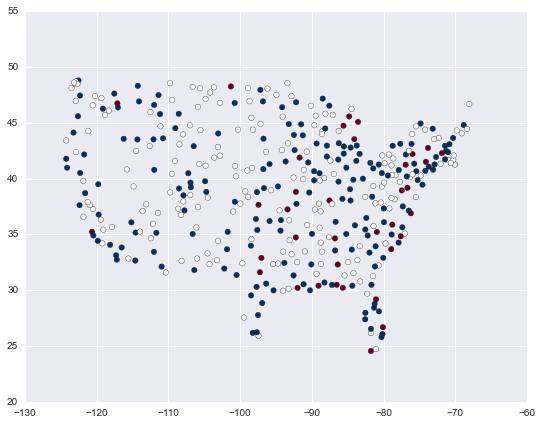

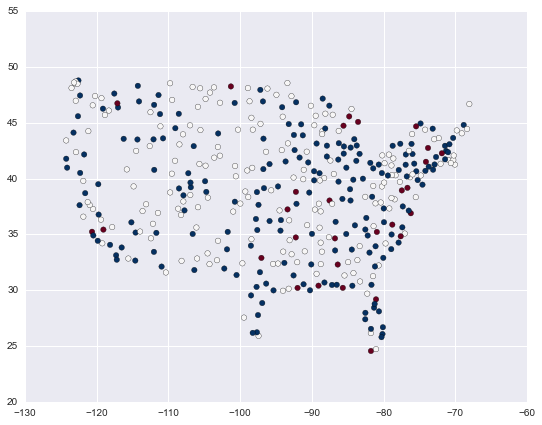

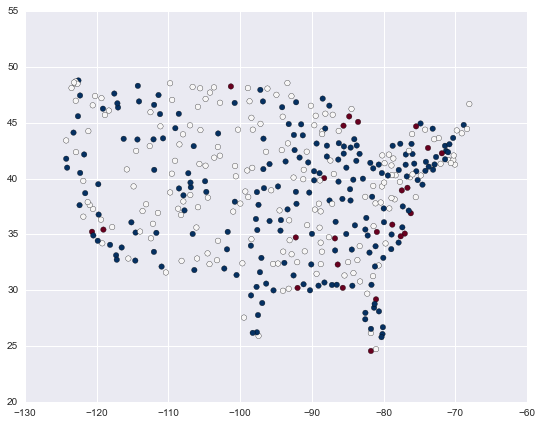

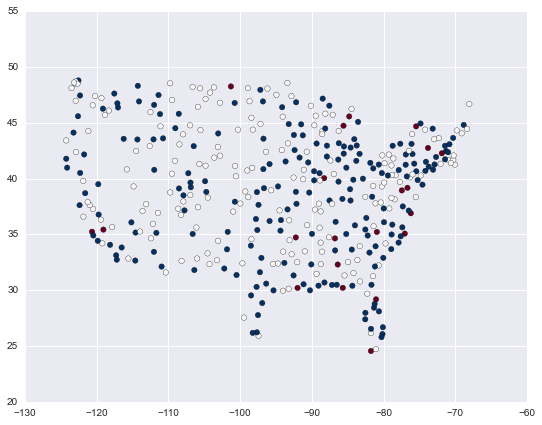

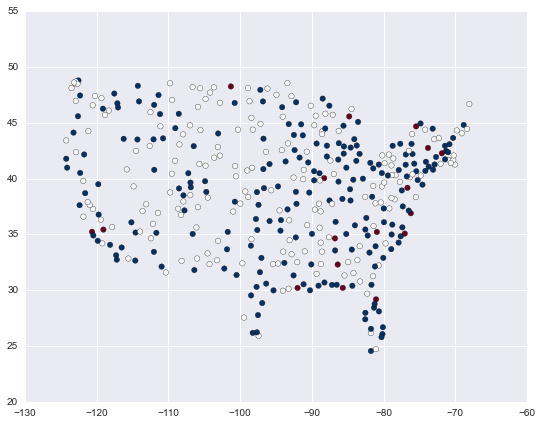

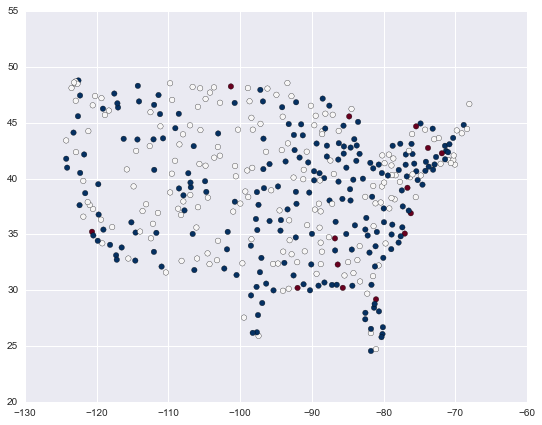

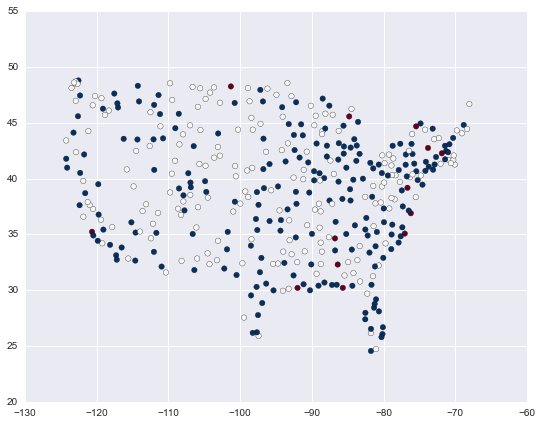

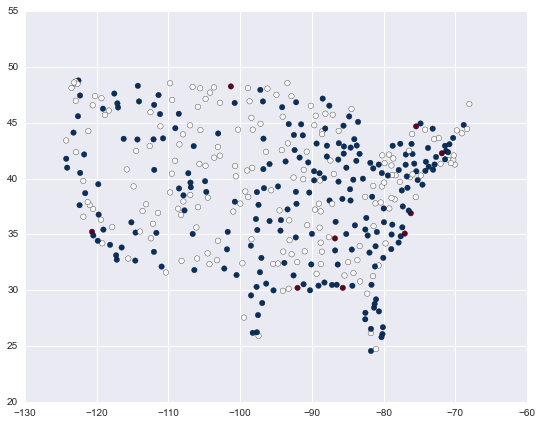

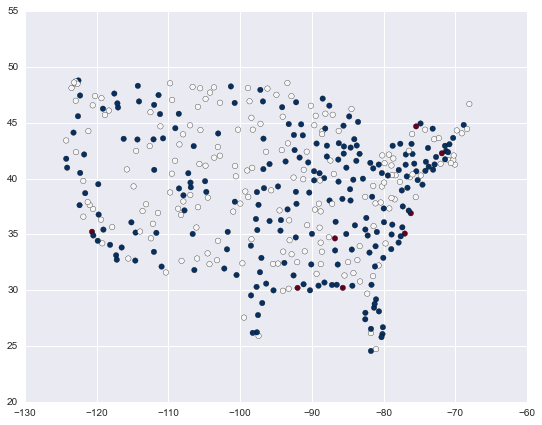

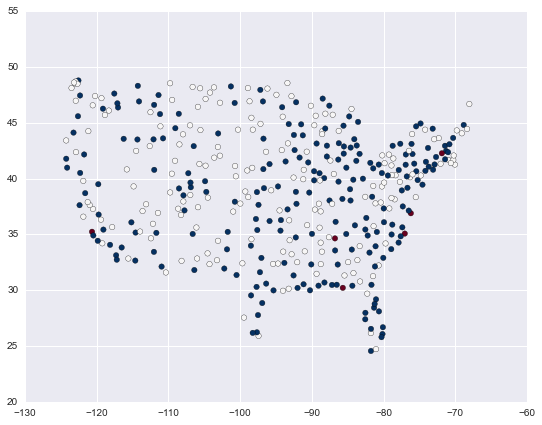

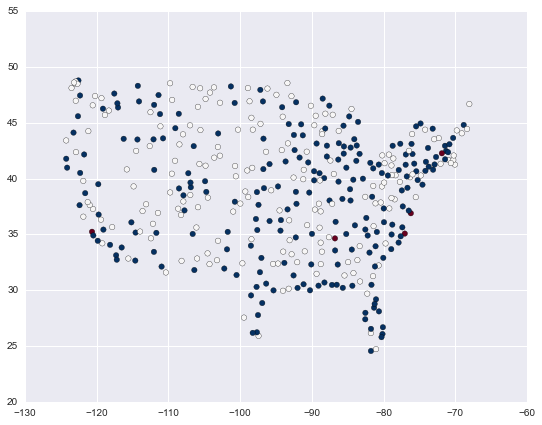

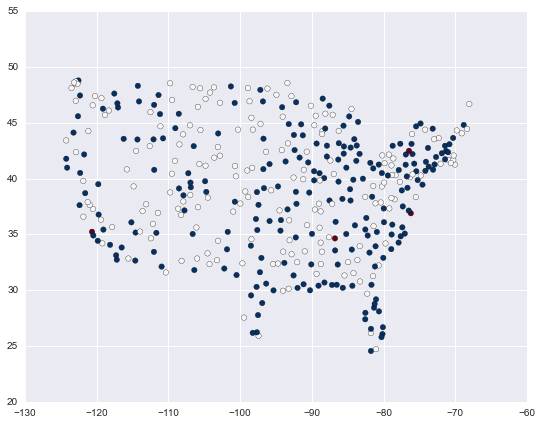

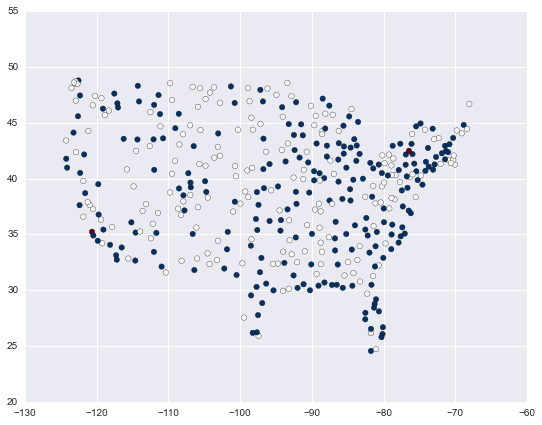

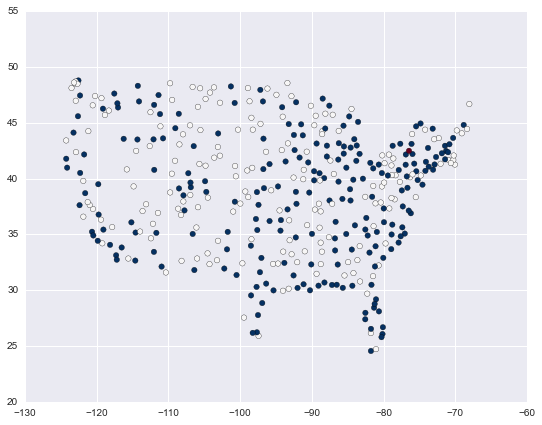

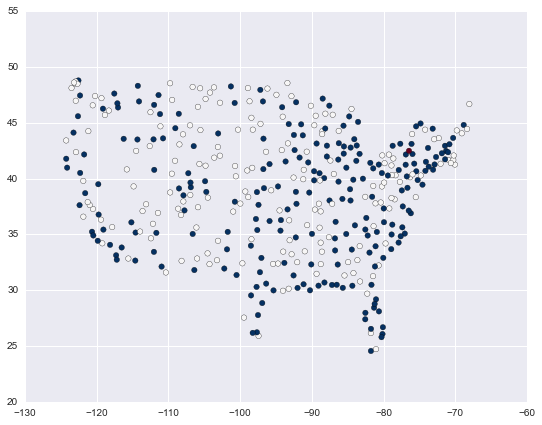

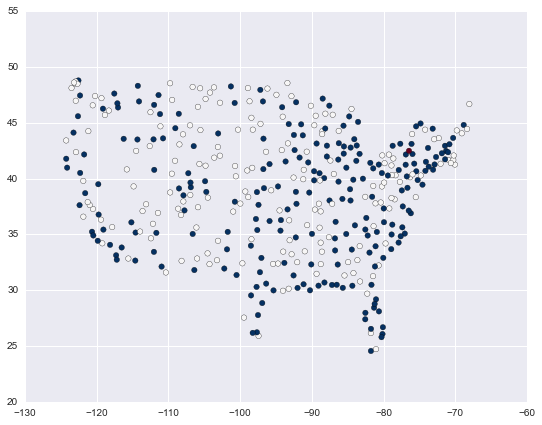

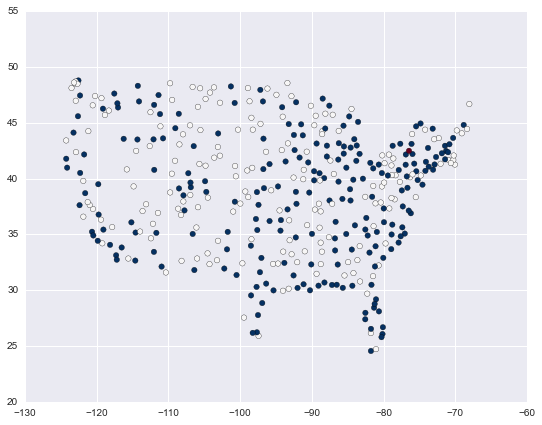

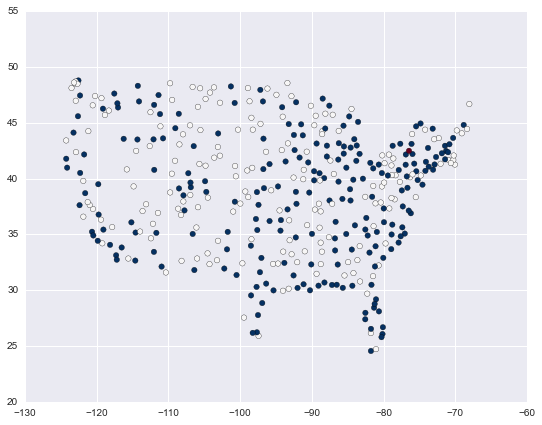

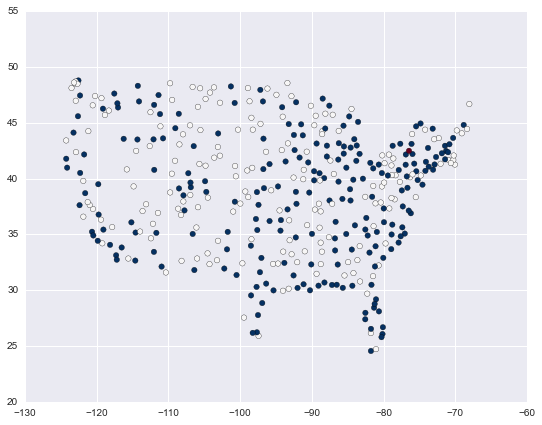

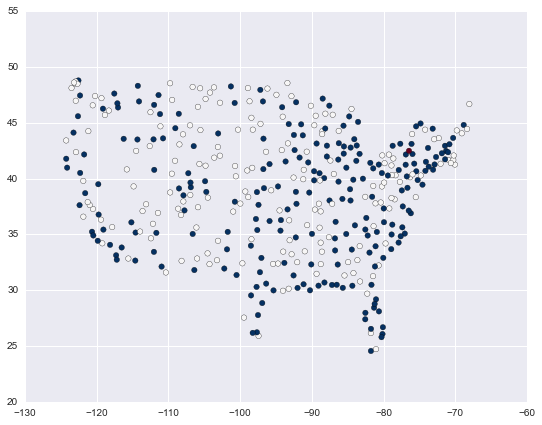

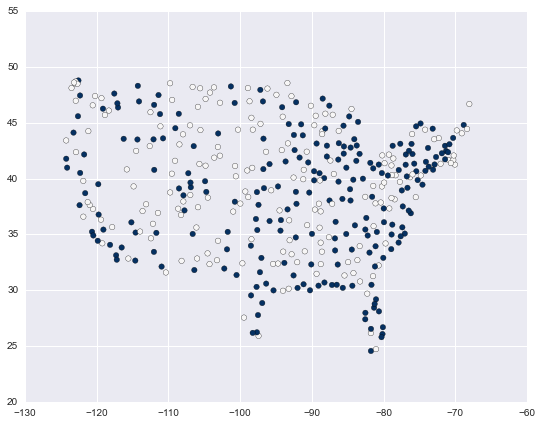

In [45]:
while len(infected_nodes)>0:
    
    for i in infected_nodes:
        for j in G.neighbors(i):
            if G.disease_status[j]==0:
                p=np.random.random()
                if p<beta:
                    G.disease_status[j]=1
                
    for k in infected_nodes:
        p=np.random.random()
        if p<mu:
            G.disease_status[k]=-1
    
    infected_nodes=[]
    for n in G.nodes():
        if G.disease_status[n]==1:
            infected_nodes.append(n)

    t+=1
    node_color=[G.disease_status[v] for v in G]#color code on disease status
    
    plt.figure(figsize=(9,7))
    nx.draw_networkx_nodes(G, pos=G.pos, node_size=30,node_color=node_color, 
                           cmap=plt.cm.RdBu_r, vmin=-1, vmax=1)
    
    #plt.savefig('./spreading_SIR_snapshot_time_'+str(t)+'.png')